# ***BANK CUSTOMER CHURN ANALYSIS***

**Major features in our dataset**

**CreditScor**e— A customer with a higher credit score is less likely to leave the bank.

**Geography** — A customer’s location can highly affect their decision to leave the bank.

**Gender** — Not a major feature really.But it’s interesting to explore whether this feature plays a role in a customer leaving the bank.

**Age** — Older customers are less likely to leave their bank than younger ones.

**Tenure** — Number of years that the customer has been a client of the bank. Older clients are more loyal and less likely to leave a bank.

**Balance** — Should be a good feature.As people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProduct**s — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — which denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember** — As active customers are less likely to leave the bank.

**EstimatedSalary **— people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — Target column . whether or not the customer left the bank.

**Complain** — Should effect the decision customer has complaint or not.

**Satisfaction Score** — Score provided by the customer for their complaint resolution.

**Card Type** — Type of card hold by the customer.(Gold,Silver,Platinum,Diamond)

**Points Earned** — the points earned by the customer for using credit card.

In [158]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [159]:
#Explore inside of the dataset

df = pd.read_csv(r'/content/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [160]:
df.shape

(10000, 18)

# There are 10000 row data's and 18 columns are available

In [161]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [162]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [163]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

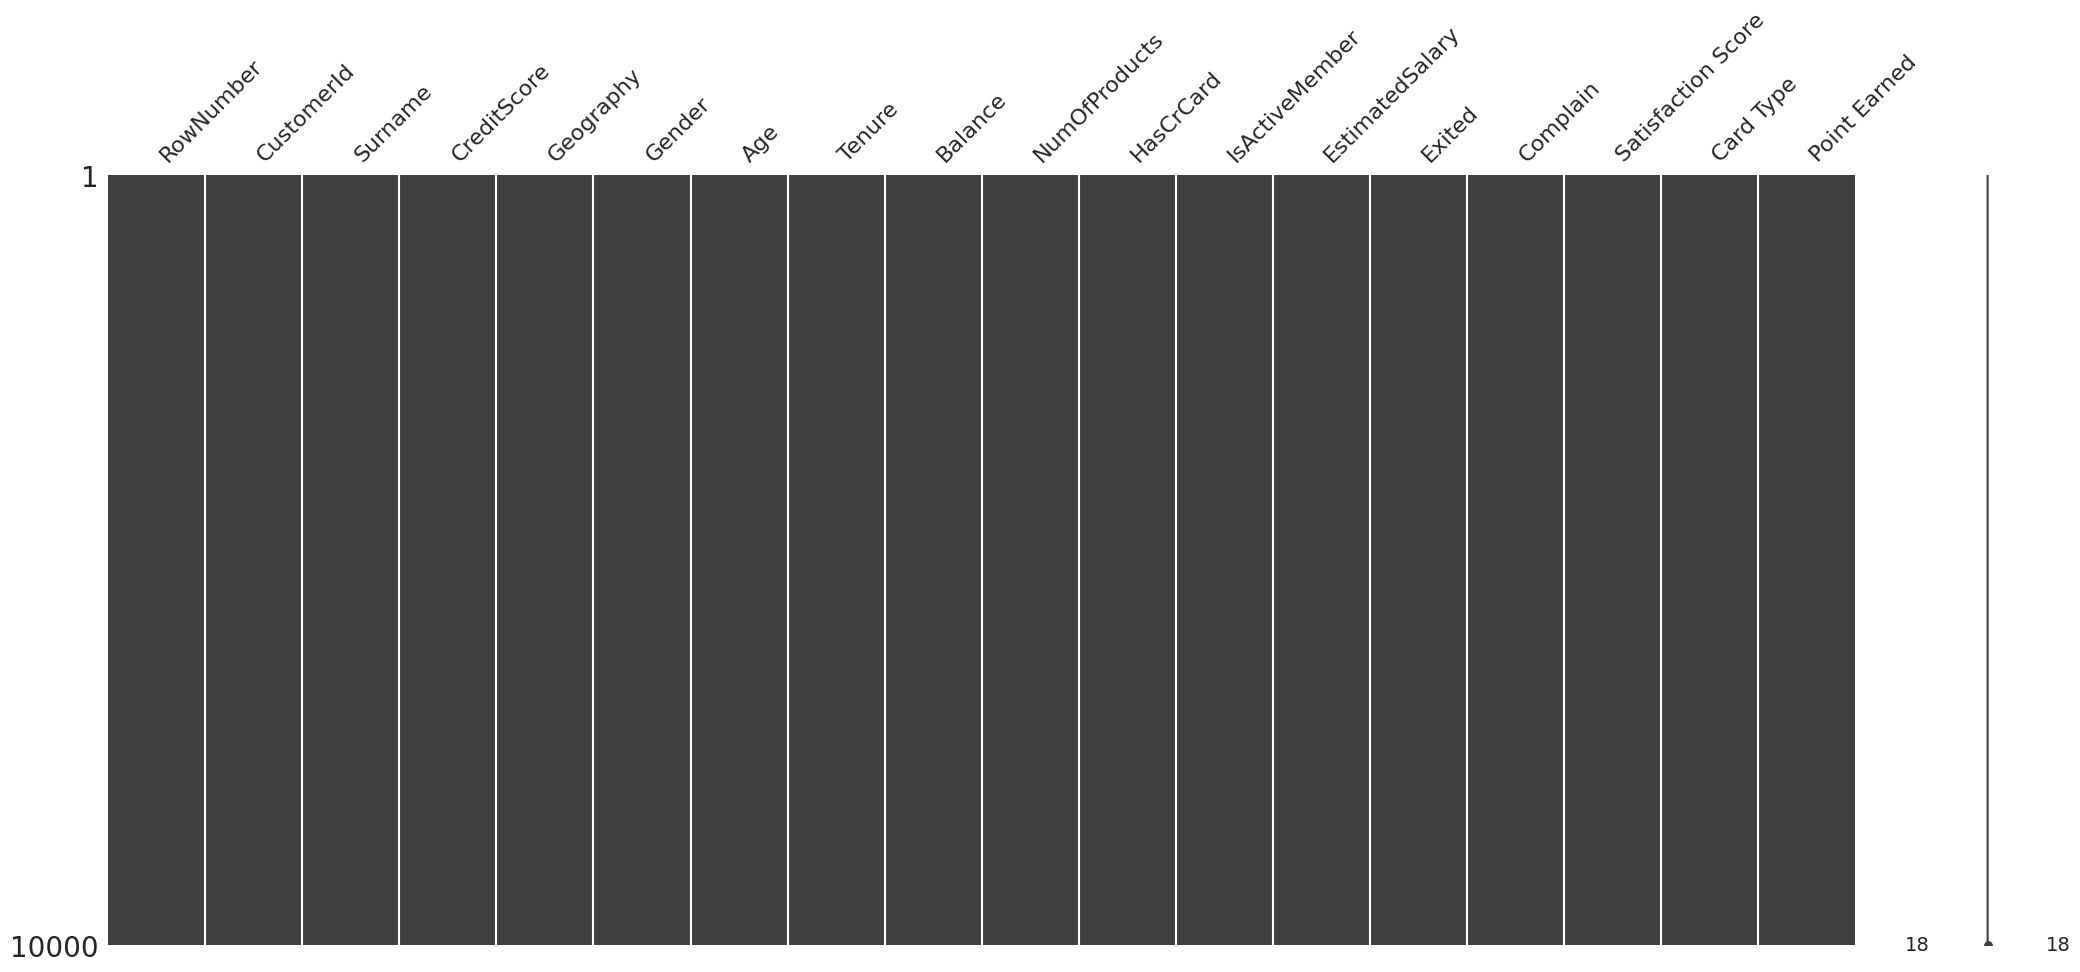

In [164]:
import missingno as msno
msno.matrix(df)
plt.show()

In [165]:
df.duplicated().sum()

0

No NuLL values and duplicate values are available there

In [166]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [167]:
#Statistical Overview

df[['CreditScore','Age','Tenure','Balance','EstimatedSalary','Satisfaction Score','Point Earned']].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,5.000000,1000.000000


In [168]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

# 7962 customers are not exited where 2038 customers are exited the bank

# ***Exploratory Data analysis***

In [169]:
Exited_persons = df.groupby(['Surname','Exited']).size().reset_index(name='Count').sort_values(by=
                                                                        'Count',ascending=False)
lt = px.bar(Exited_persons.head(10),x='Surname',y='Count',color='Surname',
            title='Top 10 exited Customers still taking Service')
lt.show()

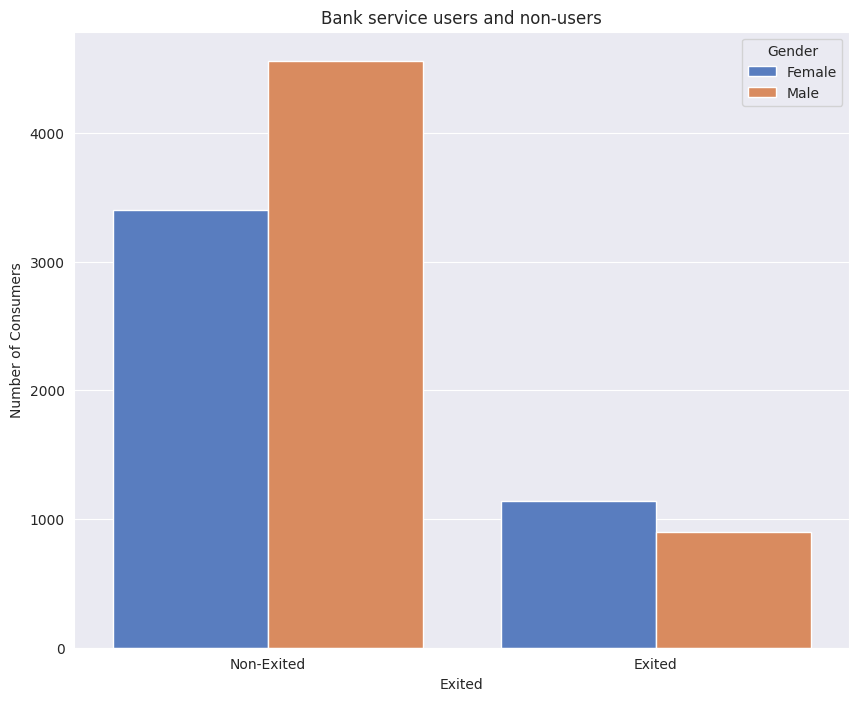

In [170]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(data = df,x='Exited',hue='Gender',palette='muted')
ax.set_xticklabels(["Non-Exited", "Exited"])
plt.title('Bank service users and non-users')
plt.ylabel('Number of Consumers')
plt.show()

# The bar chart says that Customers already exited the bank are mostly Female . On the other hand, customers who are still using the service of the bank are mostly male users.

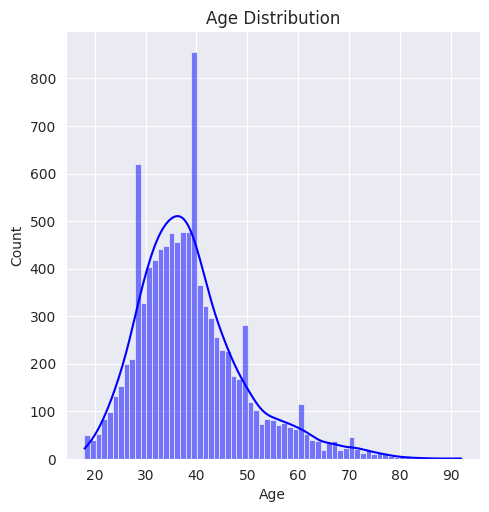

In [171]:
# consumer age distribution
sns.displot(df['Age'],color='blue',kde=True)
plt.title('Age Distribution')
plt.show()

In [172]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

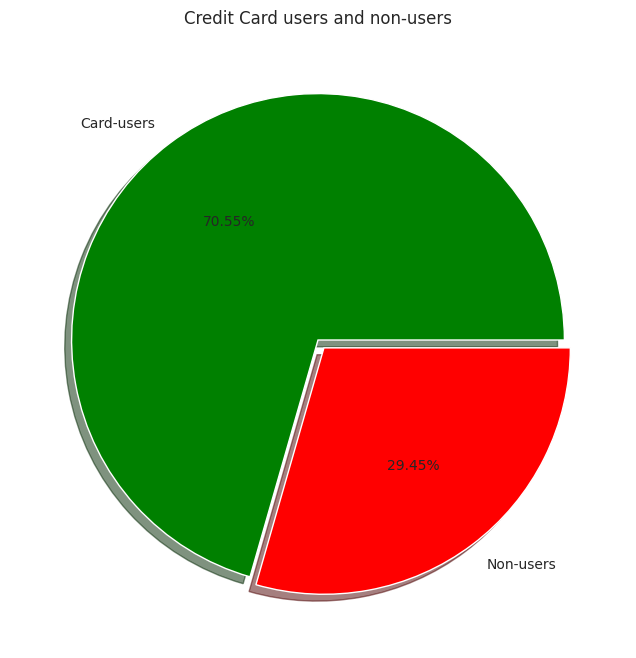

In [173]:
#Credit card users and non-users
plt.figure(figsize=(8,8))
plt.pie(data=df,x=df['HasCrCard'].value_counts(),explode=[0.0,0.04],autopct='%.2f%%',shadow=True,
       colors=['green','red'],labels=['Card-users','Non-users'])
plt.title('Credit Card users and non-users')
plt.show()

# We can see that around 70.55% customers have credit card where only 29.45% customers have no credit card for transaction

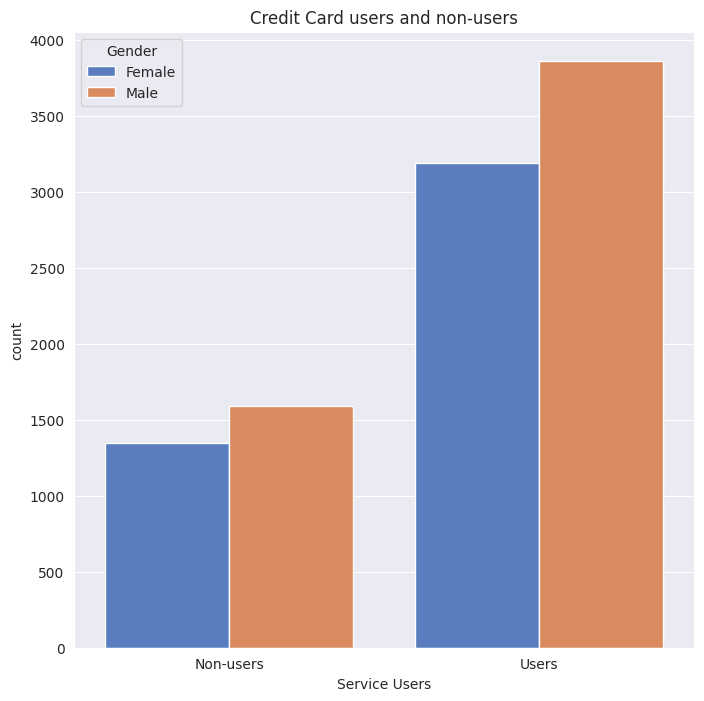

In [174]:
#Credit card users among mail and femail customers
plt.figure(figsize=(8,8))
ax = sns.countplot(data = df,x='HasCrCard',hue='Gender',palette='muted')
ax.set_xticklabels(["Non-users", "Users"])
plt.xlabel('Service Users')
plt.title('Credit Card users and non-users')
plt.show()

In [175]:
#Number of customers that have bank balance and those who have zero balance

bank_balance = df[['Surname','Balance']].sort_values(by='Balance',ascending=False)
bank_balance['Bank-balance'] = bank_balance['Balance'].apply(lambda x: 1 if x != 0 else 0)
bank_balance['Bank-balance'].value_counts()

1    6383
0    3617
Name: Bank-balance, dtype: int64

# Around 6383 consumers have balance in their account where 3617 consumers have zero balance

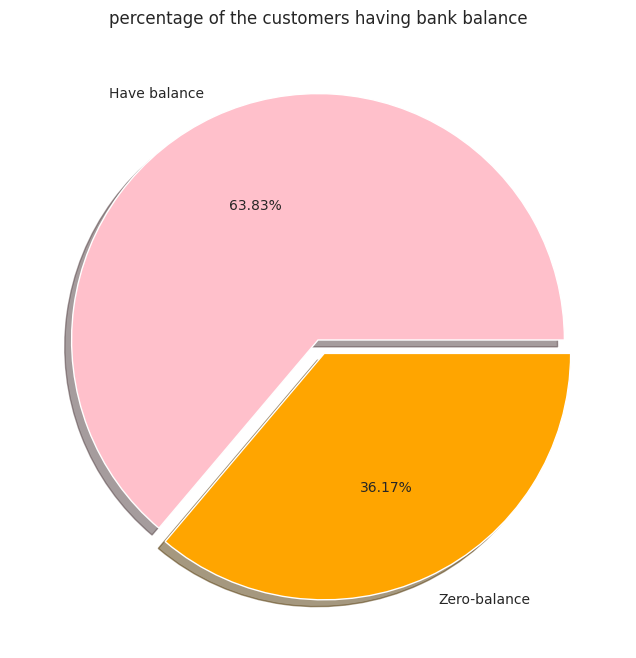

In [176]:
plt.figure(figsize=(8,8))
plt.pie(data=bank_balance,x=bank_balance['Bank-balance'].value_counts(),explode=[0.0,0.06],
       autopct='%2.2f%%',shadow=True,colors = ['pink','orange'],labels=['Have balance','Zero-balance']
       )
plt.title('percentage of the customers having bank balance')
plt.show()

# It can be seen that 63.83% customers have bank balance where 36.17% customers have zero balance in their account

In [177]:
#Top estimated salary gained consumers
earning = df.groupby('Surname')['EstimatedSalary'].mean().reset_index().sort_values(
    by='EstimatedSalary',ascending=False)
bar_ = px.line(earning.head(15),x='Surname',y='EstimatedSalary',
               title='Top fifteen Estimated Salary gained Customers')
bar_.show()

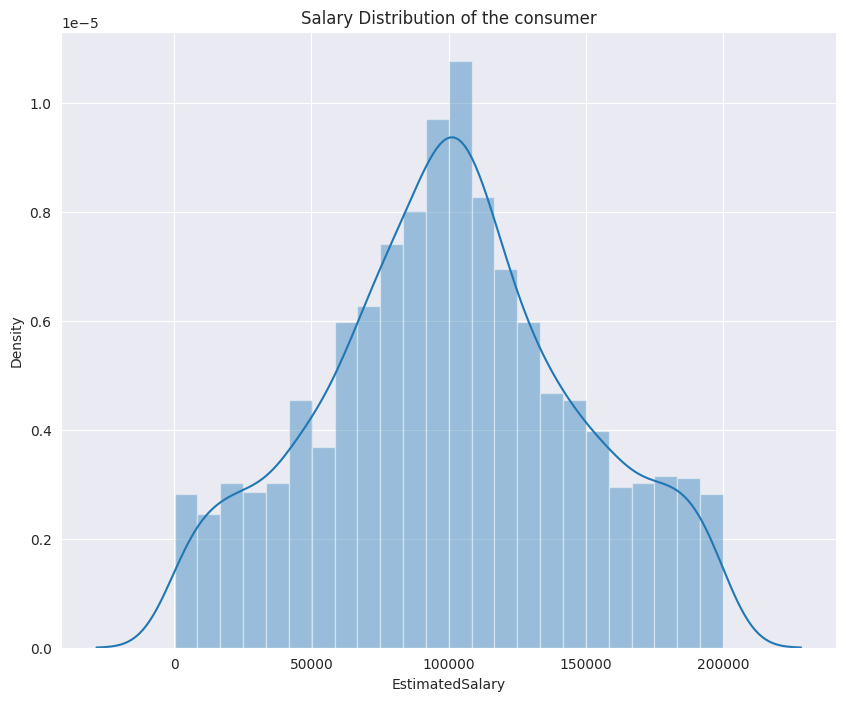

In [178]:
plt.figure(figsize=(10,8))
sns.distplot(earning['EstimatedSalary'],kde=True)
plt.title('Salary Distribution of the consumer')
plt.show()

In [179]:
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

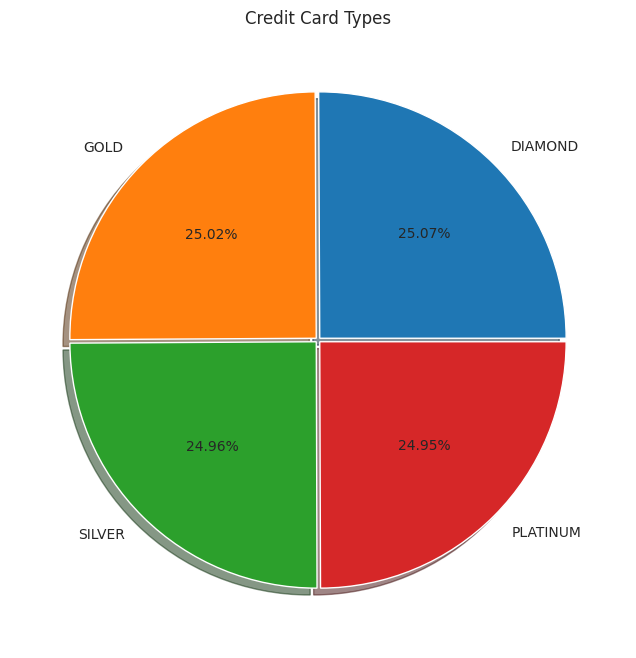

In [180]:
plt.figure(figsize=(8,8))
plt.pie(data=df,x=df['Card Type'].value_counts(),explode=[0.01,0.01,0.01,0.01],autopct='%.2f%%',
       shadow=True,labels=['DIAMOND','GOLD','SILVER','PLATINUM'])
plt.title('Credit Card Types')
plt.show()

# 25.02% coustomers hold GOLD card. 25.07% customers hold DIAMOND card. 24.96% customers hold SILVER card.24.95% customers hold PLATINUM card.

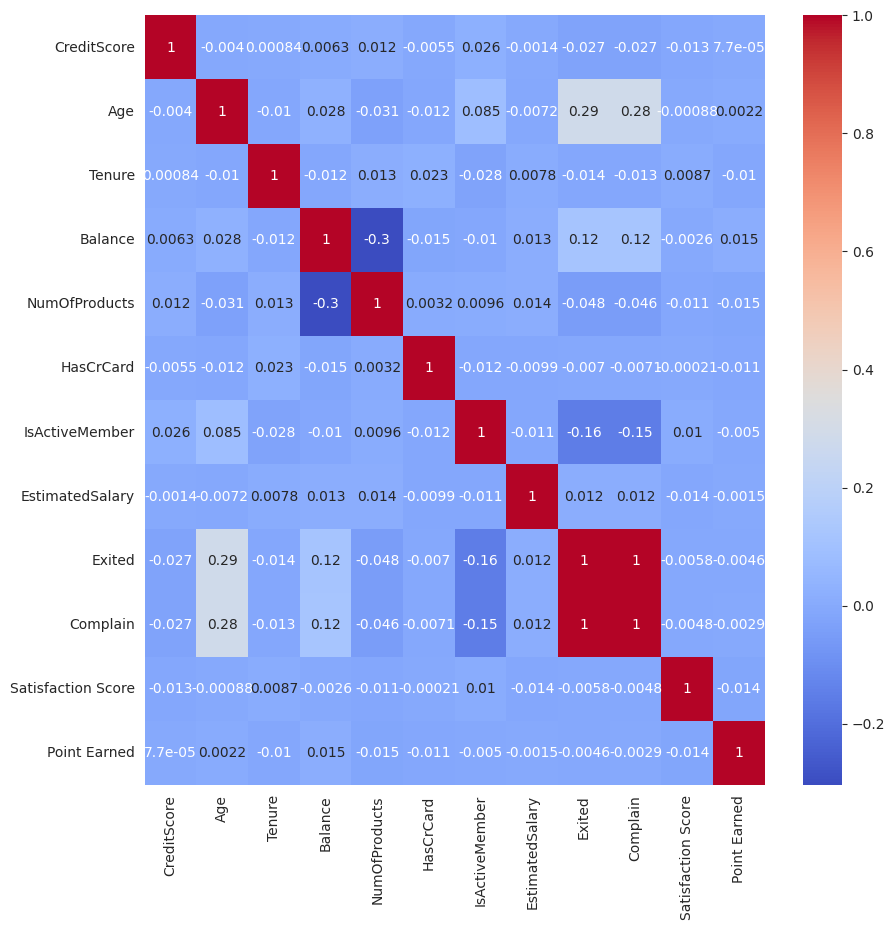

In [181]:
#Correlation among the features

corr = df.drop(['RowNumber','CustomerId','Surname','Geography','Gender','Card Type'],axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(data=corr.corr(),cmap='coolwarm',annot=True)
plt.show()

# The features variables are badly correlated to each other.

# ***Classification model***

In [182]:
# Drop less important features that are not affectd weater a customer left the service or not
# Seperate dependent variable and independent variable
x_ = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
y_ = df['Exited']

# ***Preprocessing***

In [183]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
lbl = LabelEncoder()
std = StandardScaler()

x_['Geography'] = lbl.fit_transform(x_['Geography'])
x_['Gender'] = lbl.fit_transform(x_['Gender'])
x_['Card Type'] = lbl.fit_transform(x_['Card Type'])

y_ = lbl.fit_transform(y_)  #convert the categorical values into numeric values
x_ = std.fit_transform(x_)  #Standarize the features

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [185]:
#split the dataset into training and testing set

x_train,x_test,y_train,y_test = train_test_split(x_,y_,test_size=0.2)

In [186]:
#Making a dictionary to call them at time

models ={ 'SVC':SVC(),
         'RandomForestClassifier':RandomForestClassifier(),
         'DecisionTreeClassifier':DecisionTreeClassifier(),
         'MLPClassifier':MLPClassifier(),
         'Logistic':LogisticRegression() }

# ***Fit the dataset with the algorithms***

In [187]:
#Fit our model with the dataset and check the accuracy

for keys,model in models.items():
    history = model.fit(x_train,y_train)
    print(f'{keys} : {model.score(x_test,y_test)*100}%')

SVC : 99.85000000000001%
RandomForestClassifier : 99.85000000000001%
DecisionTreeClassifier : 99.75%
MLPClassifier : 99.85000000000001%
Logistic : 99.85000000000001%


In [188]:
#predict using MLPClassifier
pred_mlp = models['MLPClassifier'].predict(x_test)

In [189]:
print(pred_mlp[:20])
print(y_test[:20])

[1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
[1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]


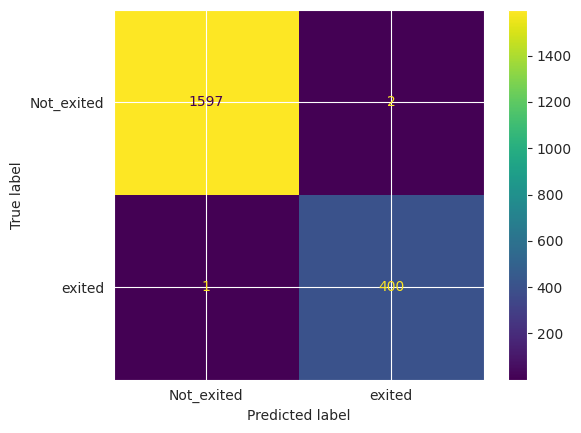

In [190]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib
%matplotlib inline
cnf = confusion_matrix(y_test,pred_mlp)
pl_cnf = ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=['Not_exited','exited'])
matplotlib.colormaps.get_cmap('magma')
pl_cnf.plot()
plt.show()

# ***Classification Report***

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1599
           1       1.00      1.00      1.00       401

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# ***Summary***

# Bank customer churn refers to the phenomenon of customers ending their relationship with a bank and taking their business elsewhere. Churn analysis involves analyzing various factors to identify customers who are at a higher risk of churning. This analysis helps banks understand the reasons behind customer attrition and take proactive steps to retain valuable customers. By leveraging techniques such as data mining and machine learning, banks can predict churn and implement targeted retention strategies. Ultimately, effective churn management enables banks to maintain customer loyalty, reduce revenue loss, and drive long-term profitability.

# In this project, we have done some exploratory data analysis using a dataset on customer leaving the service of the bank.The reasonable features are provided there. We have made a machine learning model to predict weather a customer left the service or not and found the model accuracy on testing set about 99.8% in case of MLPClassifer model.Other model performances are also good.